In [15]:
# Machine learning for each of these countries
# global-- DONE, US--DONE, EU--DONE, China--DONE, India--DONE

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
temp = pd.read_csv("cleaned_temp.csv")

In [3]:
in_data = temp[['Year', 'China']]
in_data.head()

,Year,China
0,1965,-0.002000
1,1966,0.165250
2,1967,-0.364333
3,1968,-0.072917
4,1969,-0.396083


In [4]:
X = in_data.Year.values.reshape(-1, 1)
y = in_data.China.values.reshape(-1, 1)

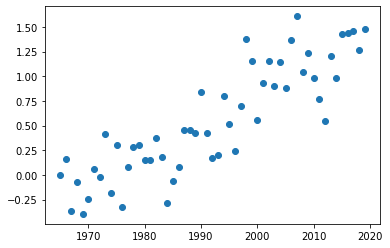

In [5]:
plt.scatter(X, y)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [7]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [8]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

In [9]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

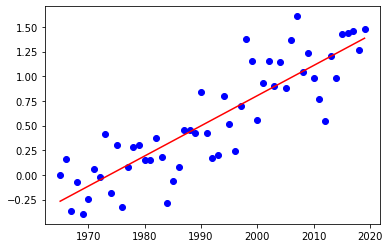

In [10]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [11]:
y_2030 = model.predict([[2030]])
y_2040 = model.predict([[2040]])
y_2050 = model.predict([[2050]])

In [13]:
my_array1 = y_2030
my_array2 = y_2040
my_array3 = y_2050

df1 = pd.DataFrame(my_array1, columns = ['2030'])
df2 = pd.DataFrame(my_array2, columns = ['2040'])
df3 = pd.DataFrame(my_array3, columns = ['2050'])

frames = [df1, df2, df3]
result = pd.concat(frames, axis=1).T
reset = result.reset_index()
# You need to rename the 0 with the same name as the column in the country df
renamed = reset.rename(columns={"index": "Year", 0: "China"})

# renamed.head()
# eu_data.head()

# Create new df
data = [in_data, renamed]
all_data = pd.concat(data, axis=0)
all_data.tail()

,Year,China
53,2018,1.269083
54,2019,1.478417
0,2030,1.721973
1,2040,2.028027
2,2050,2.334082


In [14]:
# Save .csv
ch_output = all_data.to_csv("ch_temp.csv")